Event ID: b'S696651'
Image shape: (384, 384, 49)


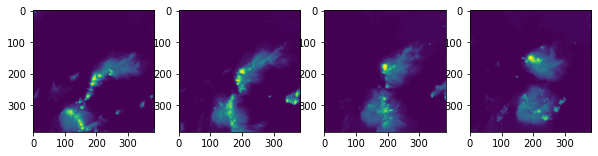

In [1]:
import os
import h5py
import matplotlib.pyplot as plt

DATA_PATH    = '../data'
CATALOG_PATH = '../CATALOG.csv' 

file_index = 0
with h5py.File('2017/SEVIR_VIL_STORMEVENTS_2017_0101_0630.h5','r') as hf:
    event_id = hf['id'][file_index]
    vil = hf['vil'][file_index]

print('Event ID:',event_id)
print('Image shape:',vil.shape)

fig,axs=plt.subplots(1,4,figsize=(10,5))
axs[0].imshow(vil[:,:,10])
axs[1].imshow(vil[:,:,20])
axs[2].imshow(vil[:,:,30])
axs[3].imshow(vil[:,:,40])
plt.show()

(<matplotlib.image.AxesImage at 0x21c8305b508>, Text(0.5, 1.0, 'VIL'))

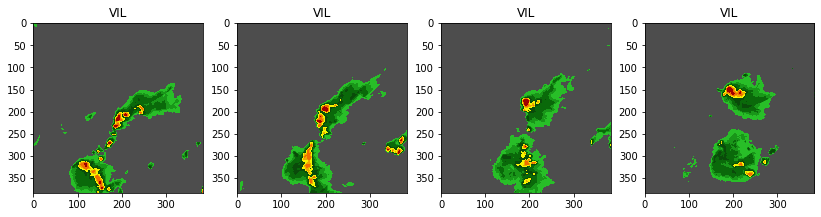

In [2]:
from display import get_cmap

vil_cmap,vil_norm,vil_vmin,vil_vmax = get_cmap('vil',encoded=True)
fig,axs = plt.subplots(1,4,figsize=(14,5))

axs[0].imshow(vil[:,:,10],cmap=vil_cmap,norm=vil_norm,vmin=vil_vmin,vmax=vil_vmax), axs[0].set_title('VIL')
axs[1].imshow(vil[:,:,20],cmap=vil_cmap,norm=vil_norm,vmin=vil_vmin,vmax=vil_vmax), axs[1].set_title('VIL')
axs[2].imshow(vil[:,:,30],cmap=vil_cmap,norm=vil_norm,vmin=vil_vmin,vmax=vil_vmax), axs[2].set_title('VIL')
axs[3].imshow(vil[:,:,40],cmap=vil_cmap,norm=vil_norm,vmin=vil_vmin,vmax=vil_vmax), axs[3].set_title('VIL')

In [3]:
import pandas as pd  

catalog = pd.read_csv('CATALOG.csv',parse_dates=['time_utc'],low_memory=False)

In [4]:
catalog = catalog[catalog.img_type=='vil']

In [5]:
sample_event = catalog.iloc[0]
sample_event

id                                                          S696651
file_name          vil/2017/SEVIR_VIL_STORMEVENTS_2017_0101_0630.h5
file_index                                                        0
img_type                                                        vil
time_utc                                        2017-06-27 02:36:00
minute_offsets    -121:-116:-111:-106:-101:-96:-91:-86:-81:-76:-...
episode_id                                                 115911.0
event_id                                                   696651.0
event_type                                                     Hail
llcrnrlat                                                 34.806025
llcrnrlon                                               -105.499821
urcrnrlat                                                 38.453525
urcrnrlon                                               -101.446271
proj              +proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...
size_x                                          

Text(0.5, 1.0, 'Pixel Longitudes')

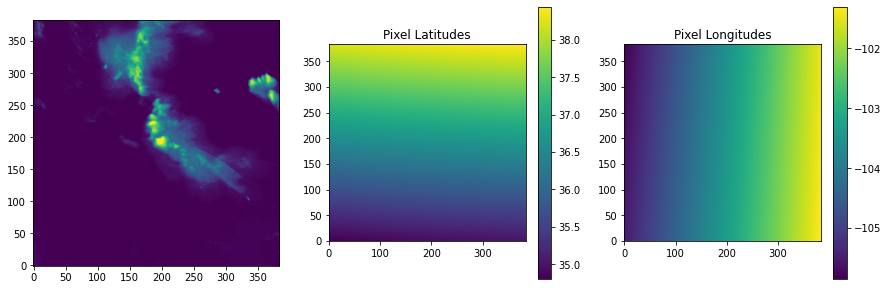

In [6]:
from laea_projection import LaeaProjection
import numpy as np

proj = LaeaProjection(sample_event.squeeze())
X,Y = np.meshgrid(np.arange(vil.shape[0]),np.arange(vil.shape[0]))
lons,lats = proj.inverse(X,Y)

# Plot with origin='lower' so up corresponds to north.
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(vil[:,:,20],origin='lower')
la = ax[1].imshow(lats,origin='lower') 
fig.colorbar(la,ax=ax[1]) 
ax[1].set_title('Pixel Latitudes')
lo = ax[2].imshow(lons,origin='lower') 
fig.colorbar(lo,ax=ax[2]) 
ax[2].set_title('Pixel Longitudes')

In [7]:
print(lats[0][0])
print(lons[0][0])

34.806024599422905
-105.49982115105122


x=-118.305222,y=41.143804


Text(-148.3052223724724, 11.143803549126375, 'Alberqueqe, NM')

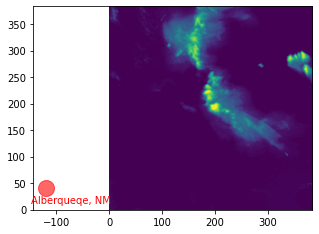

In [8]:
lat, lon = 35.0824507,-106.8323624 #Alberqueqe, NM
x,y=proj.forward(lon,lat)
print('x=%f,y=%f' % (x,y))
# Plot with origin='lower' so up corresponds to north.
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.imshow(vil[:,:,20],origin='lower')
ax.plot(x,y,linestyle='none', marker="o", markersize=16, alpha=0.6, c="red")
ax.text(x-30,y-30,'Alberqueqe, NM',color='r')

Text(-148305.22237247287, 11143.803549125209, 'Alberqueqe, NM')

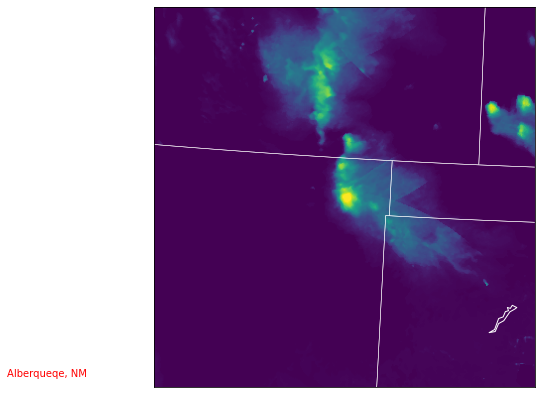

In [11]:
# Note:  Requires basemap module to run
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.basemap import Basemap # conda/pip install basemap basemap-data-hires
# Create Basemap Object
s=sample_event.squeeze() 
fig,ax=plt.subplots(1,1,figsize=(7,7))
m = Basemap(llcrnrlat=s.llcrnrlat, llcrnrlon=s.llcrnrlon,
            urcrnrlat=s.urcrnrlat,urcrnrlon=s.urcrnrlon,
            width=s.width_m, height=s.height_m,
            lat_0=38, lon_0=-98,
            projection='laea',
            resolution='i',
            ax=ax)
m.drawstates(color='w')
m.drawcoastlines(color='w')
m.drawcountries(color='w')
m.imshow(vil[:,:,24])

lat,lon = 35.0824507,-106.8323624 #Alberqueqe, NM
x,y=m(lon,lat) # will be in projection coordinates
m.plot(x,y,linestyle='none', marker="o", markersize=16, alpha=0.6, c="red")
ax.text(x-30e3,y-30e3,'Alberqueqe, NM',color='r')